In [3]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/Users/roshnisuhanda/Downloads/Viral_Social_Media_Trends.csv')

# Preview the dataset
print(data.head())

# Dataset information (columns, data types, missing values)
print(data.info())

# Statistical summary
print(data.describe(include='all'))


  Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag

/var/folders/sl/76fw6gr155z0mg5qx7hk9q_c0000gn/T/ipykernel_10878/2699465805.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Engagement_Level', order=['Low', 'Medium', 'High'], palette='viridis')


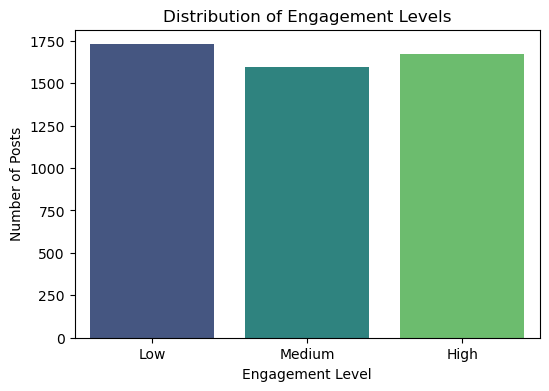

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Engagement Levels
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Engagement_Level', order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('Distribution of Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Number of Posts')
plt.show()


/var/folders/sl/76fw6gr155z0mg5qx7hk9q_c0000gn/T/ipykernel_10878/1899059199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Platform', palette='Set2')


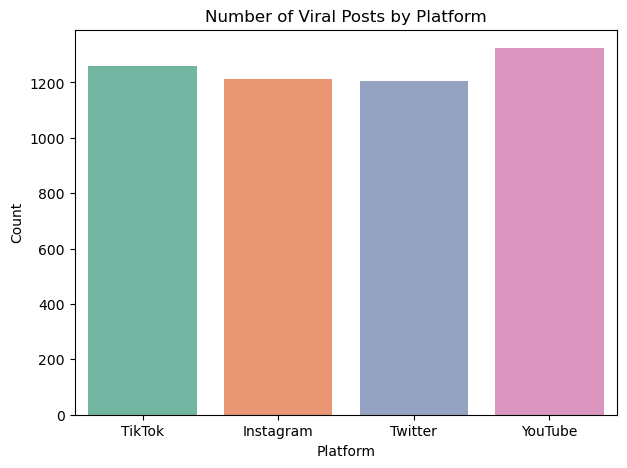

In [5]:
# Countplot of Platforms
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='Platform', palette='Set2')
plt.title('Number of Viral Posts by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()


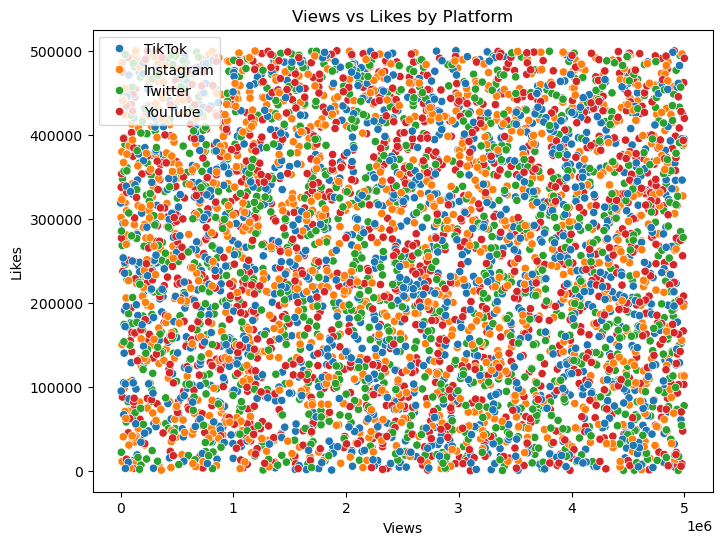

In [6]:
# Scatter plot of Views vs Likes
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Views', y='Likes', hue='Platform')
plt.title('Views vs Likes by Platform')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.legend(loc='upper left')
plt.show()


/var/folders/sl/76fw6gr155z0mg5qx7hk9q_c0000gn/T/ipykernel_10878/4118099401.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_engagement.values, y=region_engagement.index, palette='coolwarm')


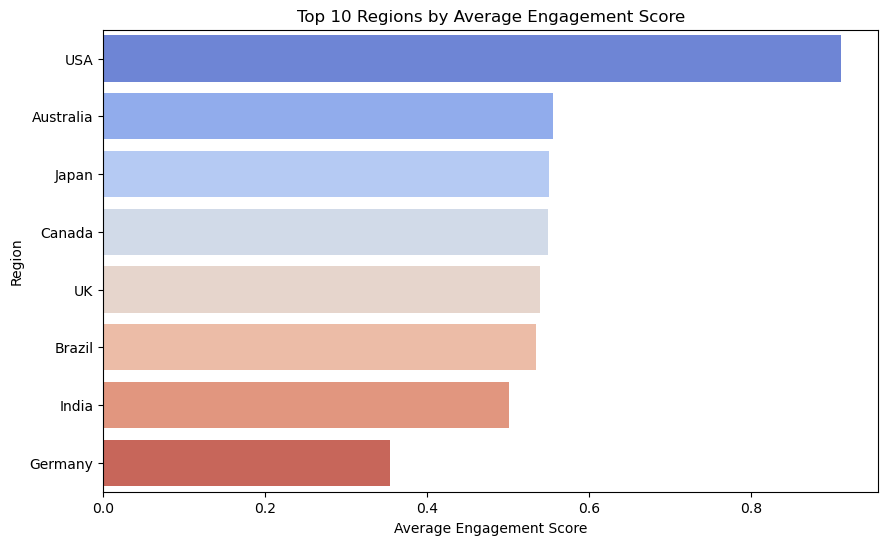

In [7]:
# Create an engagement score
data['Engagement_Score'] = (data['Likes'] + data['Shares'] + data['Comments']) / data['Views']

# Group by region
region_engagement = data.groupby('Region')['Engagement_Score'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=region_engagement.values, y=region_engagement.index, palette='coolwarm')
plt.title('Top 10 Regions by Average Engagement Score')
plt.xlabel('Average Engagement Score')
plt.ylabel('Region')
plt.show()


/var/folders/sl/76fw6gr155z0mg5qx7hk9q_c0000gn/T/ipykernel_10878/3718452651.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='mako')


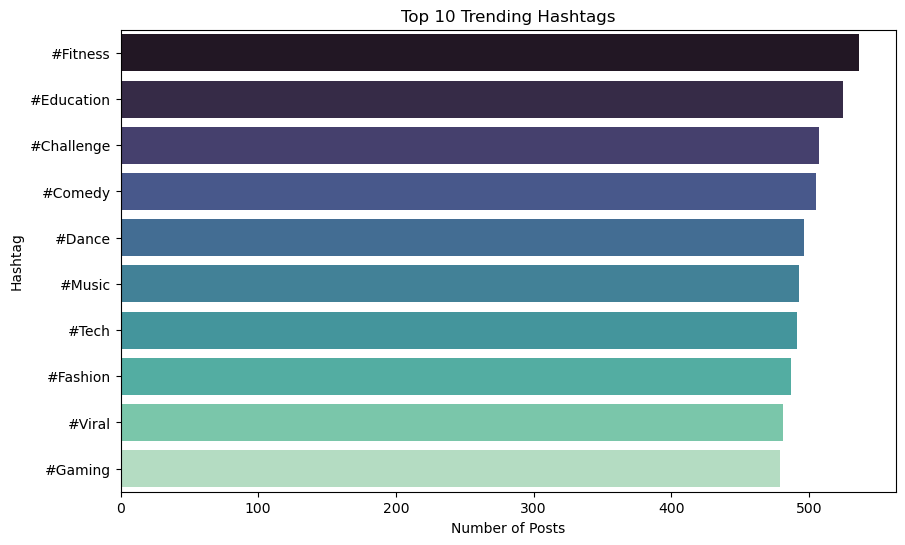

In [8]:
# Top 10 hashtags
top_hashtags = data['Hashtag'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='mako')
plt.title('Top 10 Trending Hashtags')
plt.xlabel('Number of Posts')
plt.ylabel('Hashtag')
plt.show()


In [9]:
data['Engagement_Score'] = (data['Likes'] + data['Shares'] + data['Comments']) / data['Views']


In [13]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
cat_cols = ['Platform', 'Content_Type', 'Hashtag', 'Region']

# Initialize encoder
le = LabelEncoder()

# Apply encoding
for col in cat_cols:
    data[col + '_Encoded'] = le.fit_transform(data[col])


In [14]:
features = ['Views', 'Likes', 'Shares', 'Comments', 'Engagement_Score',
            'Platform_Encoded', 'Content_Type_Encoded', 'Hashtag_Encoded', 'Region_Encoded']

target = 'Engagement_Level'


In [15]:
data['Engagement_Level_Encoded'] = le.fit_transform(data['Engagement_Level'])


In [16]:
data.to_csv('engineered_viral_trends.csv', index=False)


In [17]:
from sklearn.model_selection import train_test_split

X = data[features]
y = data['Engagement_Level_Encoded']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)


Accuracy: 0.338
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.35      0.33       335
           1       0.35      0.38      0.36       346
           2       0.34      0.29      0.31       319

    accuracy                           0.34      1000
   macro avg       0.34      0.34      0.34      1000
weighted avg       0.34      0.34      0.34      1000



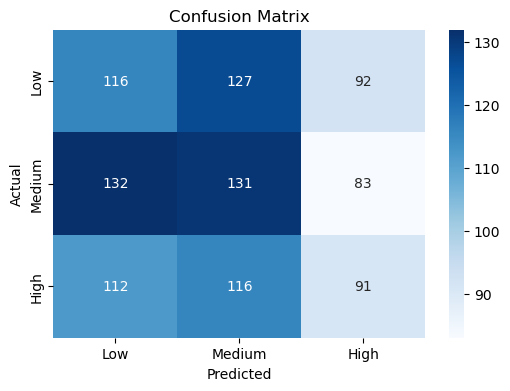

In [22]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.341
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.13      0.19       335
           1       0.34      0.80      0.48       346
           2       0.36      0.06      0.11       319

    accuracy                           0.34      1000
   macro avg       0.35      0.33      0.26      1000
weighted avg       0.35      0.34      0.26      1000



In [24]:
%pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:10:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.332
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.35      0.34       335
           1       0.32      0.34      0.33       346
           2       0.34      0.31      0.33       319

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.33      0.33      0.33      1000



In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.335
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.44      0.37       335
           1       0.36      0.36      0.36       346
           2       0.34      0.20      0.25       319

    accuracy                           0.34      1000
   macro avg       0.34      0.33      0.33      1000
weighted avg       0.34      0.34      0.33      1000



In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then use X_train_scaled and X_test_scaled instead of X_train and X_test


/var/folders/sl/76fw6gr155z0mg5qx7hk9q_c0000gn/T/ipykernel_10878/3912301538.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='Set3')


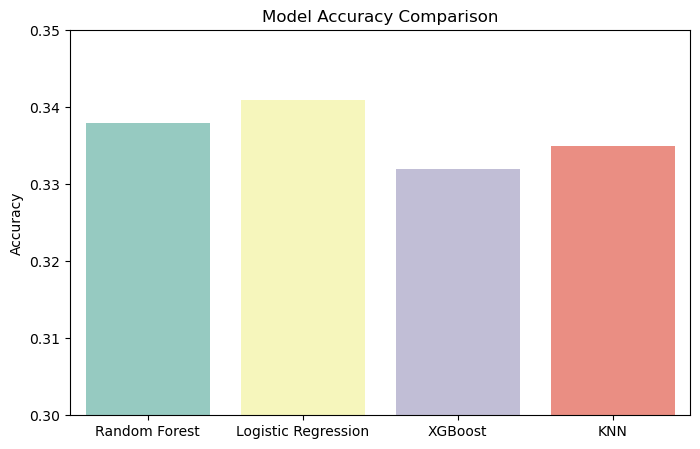

In [28]:
# Accuracy scores
model_names = ['Random Forest', 'Logistic Regression', 'XGBoost', 'KNN']
accuracies = [0.338, 0.341, 0.332, 0.335]

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=accuracies, palette='Set3')
plt.title("Model Accuracy Comparison")
plt.ylim(0.3, 0.35)
plt.ylabel("Accuracy")
plt.show()
